In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import os, glob

### I. 데이터 준비

* 이미지 사이즈 (28*28)로 변경

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/exploration/0924_rpc/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/exploration/0924_rpc/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/exploration/0924_rpc/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

500  images to be resized.
500  images resized.
가위 이미지 resize 완료!
500  images to be resized.
500  images resized.
바위 이미지 resize 완료!
500  images to be resized.
500  images resized.
보 이미지 resize 완료!


#### 1) 데이터 읽기
* load_data()함수는 입력으로 이미지가 있는 폴더위치 (예: 0923_rpc)를 받는다
* 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위:1, 보:2 로 라벨
* 정규화 (0,1) 

In [3]:
def load_data(img_path, number_of_data=1500):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/0924_rpc"
(x, y)=load_data(image_dir_path)

x_norm = x/255.0   # 입력은 0~1 사이의 값으로 정규화

이미지 개수는 1500 입니다.


#### 2) train, validation, test split

In [4]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train.shape, x_val.shape, x_test.shape)

(1125, 28, 28, 3) (225, 28, 28, 3) (150, 28, 28, 3)


라벨:  2


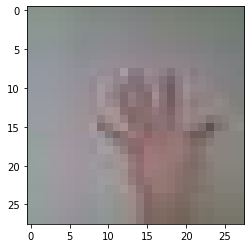

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

print('라벨: ', y_train[0])

### II. Model Building

In [6]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)))   # 데이터 크기에 맞게 입력
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))   

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

### III. Training

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_val,  y_val))

Epoch 1/10
113/113 [==============================] - 7s 27ms/step - loss: 1.0417 - accuracy: 0.4408 - val_loss: 0.6670 - val_accuracy: 0.7600
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.5931 - accuracy: 0.7711 - val_loss: 0.3228 - val_accuracy: 0.8889
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 0.3082 - accuracy: 0.8968 - val_loss: 0.2057 - val_accuracy: 0.9511
Epoch 4/10
113/113 [==============================] - 0s 4ms/step - loss: 0.1855 - accuracy: 0.9618 - val_loss: 0.1629 - val_accuracy: 0.9556
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.1214 - accuracy: 0.9646 - val_loss: 0.0832 - val_accuracy: 0.9778
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 0.9885 - val_loss: 0.0696 - val_accuracy: 0.9733
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9942 - val_loss: 0.0746 - val_accuracy: 0.9778
Epoch

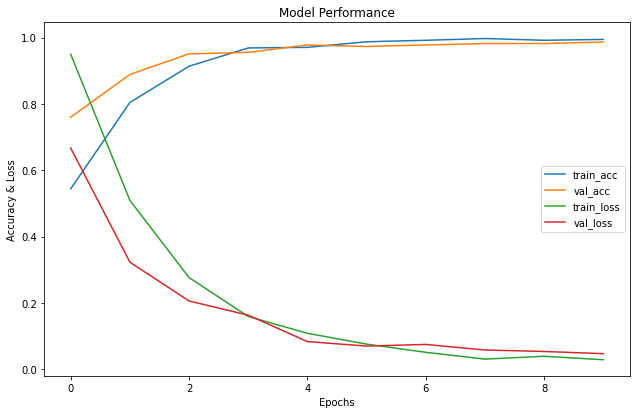

In [8]:
plt.figure(figsize=(10.5, 6.5))

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy & Loss')
plt.legend(['train_acc', 'val_acc', 'train_loss', 'val_loss'], loc='center right')

### IV.Test

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

5/5 [==============================] - 2s 251ms/step - loss: 0.0252 - accuracy: 0.9933
test_loss: 0.02520982176065445 
test_accuracy: 0.9933333396911621


In [10]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
val_loss, val_accuracy = model.evaluate(x_val, y_val)

8/8 [==============================] - 1s 152ms/step - loss: 0.0467 - accuracy: 0.9867


In [11]:
print("train_accuracy: {}".format(train_accuracy))
print("val_accuracy: {}".format(val_accuracy))
print("test_accuracy: {}".format(test_accuracy))

train_accuracy: 0.9982222318649292
val_accuracy: 0.9866666793823242
test_accuracy: 0.9933333396911621


#### 회고

* 데이터가 비슷비슷해서인지 오버피팅의 문제인지 그 외 다른 것의 문제인지 잘 모르겠지만 어디선가 잘못된 점이 있는 것 같다. 
* 이전에 내 손 데이터만 사용했을 때와 optimization behavior 차이가 분명하다: train accuracy가 epoch 2만에 0.60에서 0.98, validation set의 accuracy도 0.9에서 1이 나왔다. 
* 하지만 여기서도 test accuracy가
* 시간이 날 때 다시 차근차근 개념을 이해하고 다시 연습해보아야겠다. 